In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
from sklearn.preprocessing import *
import tensorflow as tf
from sklearn.model_selection import *
from sklearn.metrics import *

In [156]:
df = pd.read_csv("ETH_1H.csv")
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,150.39,150.39,650.188125
1,1586991600000,2020-04-15 23:00:00,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2,1586988000000,2020-04-15 22:00:00,ETHUSD,157.18,157.30,155.32,155.81,106.337279
3,1586984400000,2020-04-15 21:00:00,ETHUSD,158.04,158.31,157.16,157.18,55.244131
4,1586980800000,2020-04-15 20:00:00,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [157]:
len(df)

34497

In [158]:
df.nunique()

Unix Timestamp    34497
Date              34497
Symbol                1
Open              20189
High              19276
Low               19259
Close             20189
Volume            31404
dtype: int64

In [159]:
df_1 = df.drop(columns=["Symbol","Unix Timestamp"])
df_1.head()

,Date,Open,High,Low,Close,Volume
0,2020-04-16 00:00:00,152.94,152.94,150.39,150.39,650.188125
1,2020-04-15 23:00:00,155.81,155.81,151.39,152.94,4277.567299
2,2020-04-15 22:00:00,157.18,157.30,155.32,155.81,106.337279
3,2020-04-15 21:00:00,158.04,158.31,157.16,157.18,55.244131
4,2020-04-15 20:00:00,157.10,158.10,156.87,158.04,144.262622


In [160]:
df_2 = df_1.copy()
df_2["Date"] = pd.to_datetime(df_2["Date"])
df_2["Date"] = df_2["Date"].dt.date

grp_mean = df_2.groupby(by="Date").mean().round(2)
grp_min = df_2.groupby(by="Date").min().round(2)
grp_max = df_2.groupby(by="Date").max().round(2)

df_3 = pd.DataFrame(columns=df_2.columns[1:],index=grp_mean.index)
df_3[["Open","Close","Volume"]] = grp_mean[["Open","Close","Volume"]].copy()
df_3["Low"] = grp_min["Low"].copy()
df_3["High"] = grp_max["High"].copy()

df_3.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-05-09,8.86,12.00,0.00,9.71,122.08
2016-05-10,9.58,9.96,9.36,9.59,26.96
2016-05-11,9.90,10.47,9.68,9.93,127.19
2016-05-12,10.51,12.00,9.92,10.50,86.36
2016-05-13,10.70,11.59,10.20,10.73,76.56


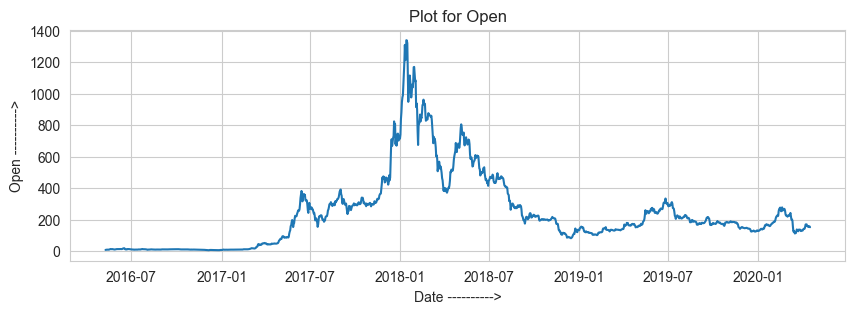

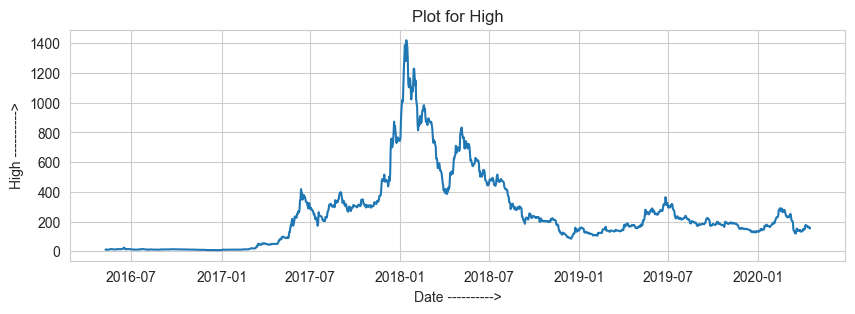

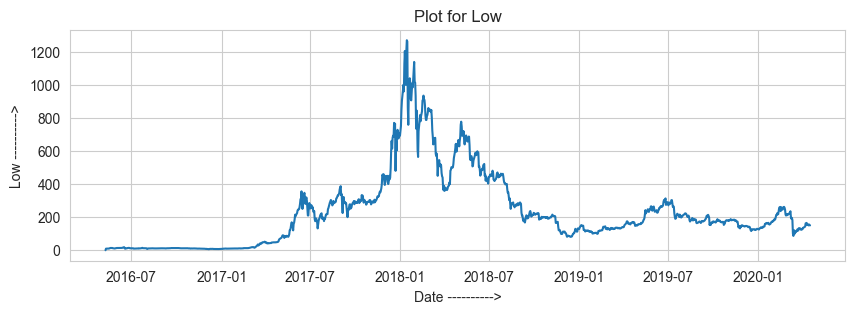

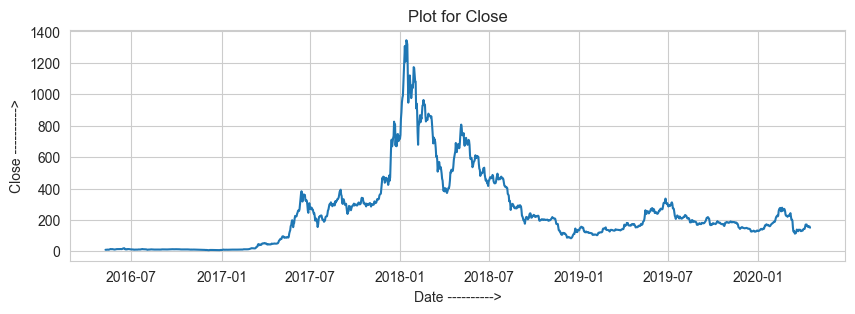

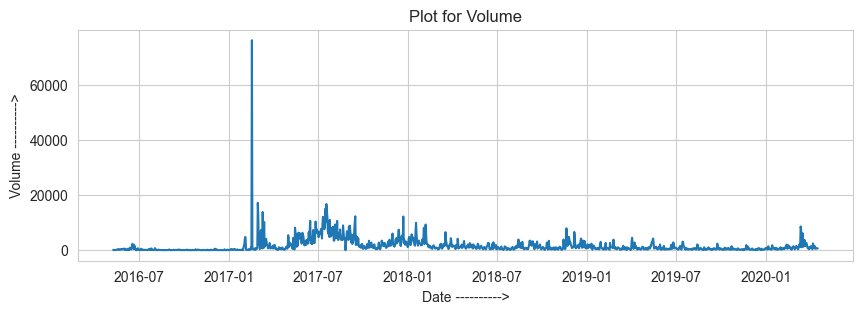

In [161]:
for i in df_3:
    plt.subplots(figsize=(10,3))
    sns.lineplot(df_3[i])
    plt.xlabel("Date ---------->")
    plt.ylabel(i+" ---------->")
    plt.title("Plot for "+i)
    plt.show()

In [162]:
df_4 = df_1.copy()
df_4["Date"] = pd.to_datetime(df_4["Date"])
df_4["hour"] = df_4["Date"].dt.hour
df_4["day"] = df_4["Date"].dt.day
df_4["month"] = df_4["Date"].dt.month
df_4["year"] = df_4["Date"].dt.year
df_4["dayofweek"] = df_4["Date"].dt.dayofweek
df_4["dayofyear"] = df_4["Date"].dt.dayofyear
df_4["weekofyear"] = df_4["Date"].dt.isocalendar().week

<Axes: >

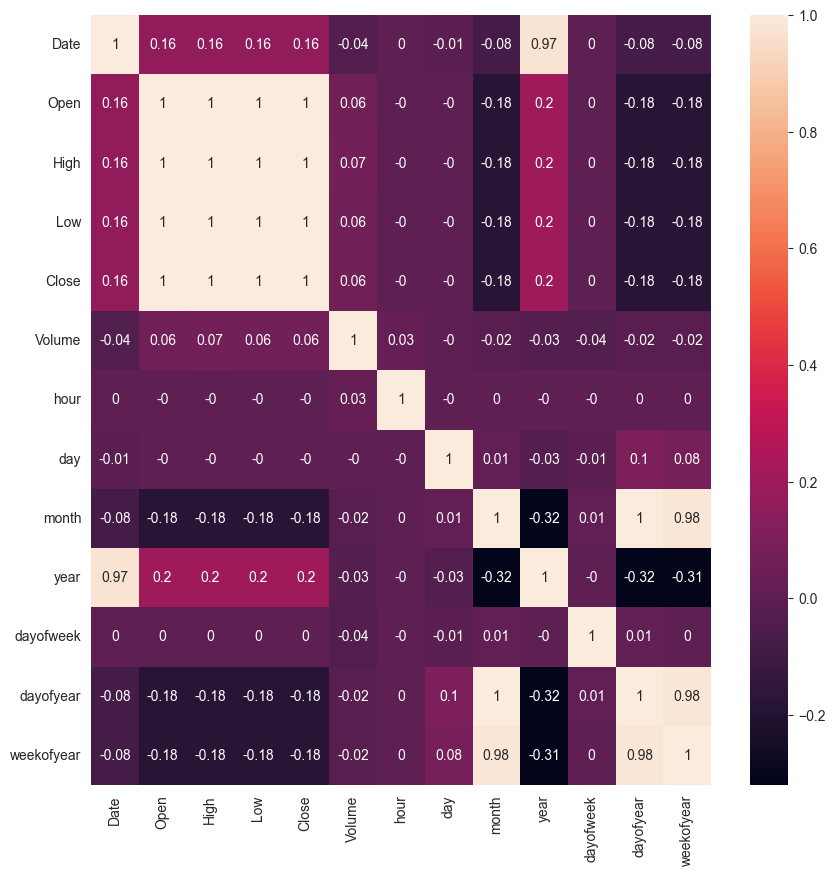

In [163]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_4.corr().round(2), annot=True)

In [164]:
df_5 = df_4.sort_values(by="Date", ascending=True).reset_index(drop=True)
df_5.head()

,Date,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
0,2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
1,2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2,2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
3,2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
4,2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


In [165]:
close = df_5["Close"]
no_of_window_samples = 240

close_length_iterate = close.shape[0] - no_of_window_samples

window = []
target = []
dates = []

for i in range(close_length_iterate):
    ini = i
    fin = i + no_of_window_samples
    window.append(close[ini:fin])
    target.append(close[fin])
    dates.append(df_5.loc[fin,"Date"])

window = np.array(window)
target = np.array(target)
dates = np.array(dates)

In [166]:
window

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [167]:
target

array([ 14.1 ,  13.68,  13.98, ..., 155.81, 152.94, 150.39])

In [168]:
mms = MinMaxScaler()

window_1 = mms.fit_transform(window)
target_1 = mms.fit_transform(target.reshape(-1,1))
dates_1 = dates.copy()

In [169]:
window_1.shape

(34257, 240)

In [170]:
window_1

array([[0.00244431, 0.00276314, 0.00275605, ..., 0.0057459 , 0.00559004,
        0.00580967],
       [0.00276314, 0.00275605, 0.00264269, ..., 0.00559004, 0.00580967,
        0.00566797],
       [0.00275605, 0.00264269, 0.0024018 , ..., 0.00580967, 0.00566797,
        0.0053704 ],
       ...,
       [0.09735447, 0.09702148, 0.09824718, ..., 0.10698294, 0.10764893,
        0.10703962],
       [0.09702148, 0.09824718, 0.09792127, ..., 0.10764893, 0.10703962,
        0.10606898],
       [0.09824718, 0.09792127, 0.09763787, ..., 0.10703962, 0.10606898,
        0.10403559]])

In [171]:
val_test_threshold = round(0.8 * window_1.shape[0])

train_val_threshold = round(0.8 * val_test_threshold)

window_train = window_1[:train_val_threshold,:]
window_val = window_1[train_val_threshold:val_test_threshold,:]
window_test = window_1[val_test_threshold:,:]

target_train = target_1[:train_val_threshold,:]
target_val = target_1[train_val_threshold:val_test_threshold,:]
target_test = target_1[val_test_threshold:,:]

target_train_1 = target[:train_val_threshold]
target_val_1 = target[train_val_threshold:val_test_threshold]
target_test_1 = target[val_test_threshold:]

train_dates = dates_1[:train_val_threshold]
val_dates = dates_1[train_val_threshold:val_test_threshold]
test_dates = dates_1[val_test_threshold:]

no_of_train_rows = window_train.shape[0]
no_of_val_rows = window_val.shape[0]
no_of_test_rows = window_test.shape[0]

window_train = window_train.reshape(no_of_train_rows,1,no_of_window_samples)
window_val = window_val.reshape(no_of_val_rows,1,no_of_window_samples)
window_test = window_test.reshape(no_of_test_rows,1,no_of_window_samples)

In [172]:
window

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [173]:
window_train.shape

(21925, 1, 240)

In [174]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.LSTM(units=100,input_shape=(1,no_of_window_samples)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(1,activation="linear")
])

In [175]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error)

In [176]:
model.fit(window_train,target_train,validation_data=(window_val,target_val),epochs=100,batch_size=32,verbose=1,shuffle=True,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
686/686 [==============================] - 11s 9ms/step - loss: 0.0015 - val_loss: 1.5792e-05
Epoch 2/100
686/686 [==============================] - 5s 7ms/step - loss: 8.6299e-04 - val_loss: 1.2414e-05
Epoch 3/100
686/686 [==============================] - 5s 7ms/step - loss: 6.9591e-04 - val_loss: 1.3309e-05
Epoch 4/100
686/686 [==============================] - 5s 7ms/step - loss: 6.2588e-04 - val_loss: 4.3623e-05


In [177]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               136400    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 136501 (533.21 KB)
Trainable params: 136501 (533.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
target_pred_p = model.predict(window_test,verbose=0)
target_pred = mms.inverse_transform(target_pred_p)
root_mean_squared_error = np.round(np.sqrt(mean_squared_error(target_test,target_pred)),2)
root_mean_squared_error

196.27

<Axes: >

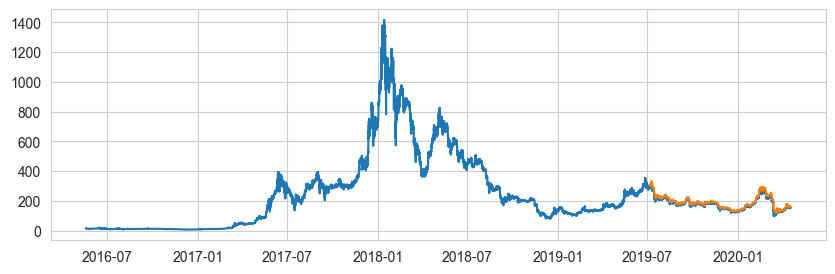

In [179]:
plt.subplots(figsize=(10,3))
sns.lineplot(x=dates,y=target)
test_dates = np.reshape(test_dates,(1,-1))[0]
target_pred = np.reshape(target_pred,(1,-1))[0]
sns.lineplot(x=test_dates,y=target_pred)

### Prediction of Future Values

In [180]:
mms = MinMaxScaler()
window_scaled = mms.fit_transform(window)
target_scaled = mms.fit_transform(target.reshape(-1,1))

In [181]:
train_val_threshold = round(0.8 * window.shape[0])

window_train = window_scaled[:train_val_threshold]
target_train = target_scaled[:train_val_threshold]

window_val = window_scaled[train_val_threshold:]
target_val = target_scaled[train_val_threshold:]

no_of_train_rows = window_train.shape[0]
no_of_val_rows = window_val.shape[0]

window_train = window_train.reshape(no_of_train_rows,1,no_of_window_samples)
window_val = window_val.reshape(no_of_val_rows,1,no_of_window_samples)

In [182]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.LSTM(units=100,input_shape=(1,no_of_window_samples)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(1,activation="linear")
])

In [183]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error)

In [184]:
model.fit(window_train,target_train,validation_data=(window_val,target_val),epochs=100,batch_size=32,verbose=1,shuffle=True,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
857/857 [==============================] - 12s 8ms/step - loss: 0.0015 - val_loss: 9.4802e-05
Epoch 2/100
857/857 [==============================] - 6s 7ms/step - loss: 6.8603e-04 - val_loss: 5.1393e-05
Epoch 3/100
857/857 [==============================] - 6s 7ms/step - loss: 5.8183e-04 - val_loss: 1.3844e-04
Epoch 4/100
857/857 [==============================] - 6s 7ms/step - loss: 4.9443e-04 - val_loss: 1.6690e-05
Epoch 5/100
857/857 [==============================] - 6s 7ms/step - loss: 4.7697e-04 - val_loss: 3.7819e-05
Epoch 6/100
857/857 [==============================] - 6s 7ms/step - loss: 4.3853e-04 - val_loss: 1.5164e-04


In [190]:
future_start_date = "2020-04-16 01:00:00"
future_end_date = pd.to_datetime("2020-05-17 01:00:00")
window_test = []
target_test = []

future_dates = pd.date_range(start=future_start_date,end=future_end_date,freq="h").values

window_test.append(np.array(window[-1,1:].tolist() + [target[-1]]))

for i in range(1,len(future_dates)):
    target_test.append(model.predict(window_test[i-1][:]))
    window_test.append(np.array(window_test[i-1][1:].tolist() + [target_test[i]]))

ValueError: in user code:

    File "C:\Users\amith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\amith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\amith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\amith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\amith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\amith\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [74]:
future_values[0]

[144.31,
 143.91,
 144.21,
 148.28,
 148.99,
 150.3,
 149.68,
 150.2,
 154.69,
 153.32,
 154.51,
 156.43,
 156.18,
 156.37,
 161.61,
 163.93,
 166.28,
 166.3,
 165.4,
 164.07,
 166.23,
 165.94,
 171.49,
 172.0,
 169.97,
 170.1,
 171.24,
 169.5,
 170.42,
 171.0,
 174.04,
 173.2,
 174.17,
 174.87,
 172.94,
 170.8,
 171.5,
 168.64,
 169.51,
 173.24,
 172.34,
 169.85,
 169.24,
 164.11,
 167.54,
 166.52,
 164.7,
 164.67,
 164.32,
 168.89,
 172.21,
 172.61,
 174.16,
 169.93,
 170.36,
 168.85,
 169.17,
 167.47,
 168.85,
 168.97,
 166.87,
 168.49,
 169.17,
 170.71,
 170.77,
 171.03,
 170.75,
 172.35,
 171.96,
 173.0,
 173.48,
 172.91,
 171.07,
 171.53,
 170.44,
 170.06,
 170.89,
 171.25,
 172.66,
 172.81,
 170.84,
 171.28,
 168.14,
 170.95,
 171.75,
 171.27,
 170.22,
 169.96,
 170.35,
 168.8,
 169.47,
 170.51,
 170.73,
 171.16,
 171.16,
 170.01,
 169.34,
 168.25,
 163.71,
 163.53,
 160.99,
 160.74,
 158.35,
 157.88,
 158.26,
 158.99,
 158.21,
 158.7,
 158.58,
 157.85,
 153.52,
 156.72,
 157.53

In [62]:
train_val_threshold = round(0.8 * window.shape[0])

window_train = window[:train_val_threshold,:]
window_val = window_1[train_val_threshold:val_test_threshold,:]
window_test = window_1[val_test_threshold:,:]

target_train = target_1[:train_val_threshold,:]
target_val = target_1[train_val_threshold:val_test_threshold,:]
target_test = target_1[val_test_threshold:,:]

target_train_1 = target[:train_val_threshold]
target_val_1 = target[train_val_threshold:val_test_threshold]
target_test_1 = target[val_test_threshold:]

train_dates = dates_1[:train_val_threshold]
val_dates = dates_1[train_val_threshold:val_test_threshold]
test_dates = dates_1[val_test_threshold:]

no_of_train_rows = window_train.shape[0]
no_of_val_rows = window_val.shape[0]
no_of_test_rows = window_test.shape[0]

window_train = window_train.reshape(no_of_train_rows,1,no_of_window_samples)
window_val = window_val.reshape(no_of_val_rows,1,no_of_window_samples)
window_test = window_test.reshape(no_of_test_rows,1,no_of_window_samples)

In [63]:
model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.LSTM(units=100,input_shape=(1,no_of_window_samples)),
    tf.keras.layers.Dropout(rate=0.25),
    tf.keras.layers.Dense(1,activation="linear")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mean_squared_error)
model.fit(window,target,validation_data=(window_val,target_val),epochs=100,batch_size=32,verbose=1,shuffle=True,callbacks=tf.keras.callbacks.EarlyStopping(patience=2))

Epoch 1/100
1053/1071 [============================>.] - ETA: 0s - loss: 100394.3047

In [55]:
window

array([[  9.55,  10.  ,   9.99, ...,  14.21,  13.99,  14.3 ],
       [ 10.  ,   9.99,   9.83, ...,  13.99,  14.3 ,  14.1 ],
       [  9.99,   9.83,   9.49, ...,  14.3 ,  14.1 ,  13.68],
       ...,
       [143.51, 143.04, 144.77, ..., 157.1 , 158.04, 157.18],
       [143.04, 144.77, 144.31, ..., 158.04, 157.18, 155.81],
       [144.77, 144.31, 143.91, ..., 157.18, 155.81, 152.94]])

In [56]:
target

array([ 14.1 ,  13.68,  13.98, ..., 155.81, 152.94, 150.39])